## Transformada de Fourier
## Implementación en Python 
### José Alberto Moreno Guerra

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
plt.style.use('classic')

In [2]:
pi=np.arccos(-1) # Pi
def gaussian(x, mu, sig):
    return (1./(np.sqrt(2.*pi)*sig))*np.exp((1./2)*(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))))

### Para cada uno de los datos se calcula su transformada usando la siguiente expresión 

$\hat{f}\left [ \omega  \right ]^{k}=\sum_{m=1}^{n-1}f^{m}(x)e^{-2\pi i\frac{mk}{n}}$

In [3]:
def FFT_vectorized(x):
    """A vectorized, non-recursive version of the Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]

    if np.log2(N) % 1 > 0:
        raise ValueError("size of x must be a power of 2")

    # N_min here is equivalent to the stopping condition above,
    # and should be a power of 2
    N_min = min(N, 32)
    
    # Perform an O[N^2] DFT on all length-N_min sub-problems at once
    n = np.arange(N_min)
    k = n[:, None]
    M = np.exp(-2j * np.pi * n * k / N_min)
    X = np.dot(M, x.reshape((N_min, -1)))

    # build-up each level of the recursive calculation all at once
    while X.shape[0] < N:
        X_even = X[:, :X.shape[1] / 2]
        X_odd = X[:, X.shape[1] / 2:]
        factor = np.exp(-1j * np.pi * np.arange(X.shape[0])
                        / X.shape[0])[:, None]
        X = np.vstack([X_even + factor * X_odd,
                       X_even - factor * X_odd])

    return X.ravel()

### La función empleada es una gaussiana

$g(x)=\frac{1}{\sqrt{2\pi }\sigma }e^{-\frac{1}{2}\left ( \frac{x-\mu }{\sigma }\right )^{2}}$

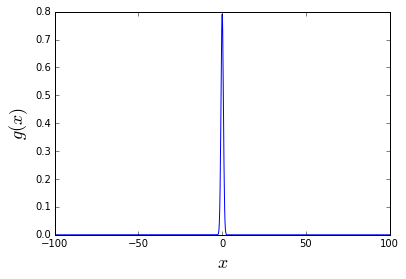

In [4]:
x = np.linspace(-100.,100.,1024)
plt.plot(x,gaussian(x,0.,.5))
plt.xlabel("$x$",fontsize = 18)
plt.ylabel("$g(x)$",fontsize = 18)
plt.show()

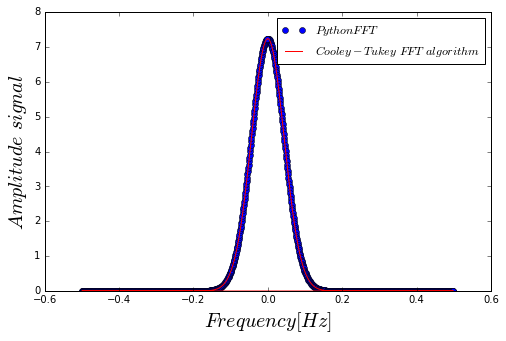

In [5]:
plt.figure(figsize=(8,5))
gfft = fft(gaussian(x,0.,.5))
xf=np.fft.fftfreq(np.size(gfft))
m = np.size(gfft)
plt.plot(xf,abs(gfft), 'bo',label = "$Python FFT$")
plt.plot(xf,abs(FFT_vectorized(gaussian(x,0.,.5))), 'r-',label = "$Cooley-Tukey$ $FFT$ $algorithm$")
plt.xlabel("$Frequency [Hz]$",fontsize = 20)   # Establece el título del eje x
plt.ylabel("$Amplitude$ $signal$",fontsize = 20)   # Establece el título del eje y
plt.legend()
plt.show()